# Zero to Hero with `fastai` - Beginner
> An introduction to the world of Deep Learning, what the `fastai` library is, and the problems it attempts to solve

* toc: true
* badges: true
* comments: true

## Zero to Hero

The "Zero to Hero" series is a collection of three seperate articles geared towards getting anyone familair with the `fastai` library based upon their skill sets. This article is geared towards those who have barely heard of "Deep Learning" and have zero experience with frameworks. The [intermediate](https://muellerzr.github.io/fastblog/2020/08/20/_08_21-intermediate.html) article comes from a perspective of those who utilized the original fastai library in the past and understand the broad strokes of the library. Finally, the last article will briefly explain the advanced artifacts inside of `fastai` and how they all function. 

## Who am I

My name is Zach Mueller, I've extensively been involved and using fastai (and the newest version) for the better part of two years now. I've designed my own course geared around the library from an implementation standpoint without getting too complex. At the time of writing this I'm still an Undergraduate at the University of West Florida majoring in Computer Science. I'm also heavily involved inside the [fastai community](https://forums.fast.ai/), of which I would emplore you to join! My goal is to make fastai more approachable at all levels through examples and help further Jeremy's dream in the process. My specific interests involve [speeding up the framework for deployment](https://github.com/muellerzr/fastinference), tabular neural networks, and providing overall usage guides to help further the community

## What will we cover in this article?

In broad strokes, this article will cover what exactly a "Jupyter Notebook" is and why it is popular among the Machine Learning community. Next we will divulge into `fastai`, what the library aims to do, and why it can be considered a "library for all." Afterwards we will close by showing examples of what a "model" is and how to utilize the framework at a high level to complete your Deep Learning tasks.

## What is a "Jupyter Notebook"?

Why, you're reading one now! A Jupyter Notebook is a type of workflow that involves *active* coding. In a typical software development setting, normally everything would be put into various files and run from a console (such as `.cpp`, `.py`, etc). This does not provide much interactability to the user, nor anyone reading the code over. 

Jupyter provides a middle-ground for this. Each "cell" in a notebook can be run independantly of others, such as a quick example below where we do a basic addition:

> To run a Jupyter cell, you can press "shift + enter"

In [ ]:
o = 1+2; print(o)

3


Jupyter uses [pretty print](https://docs.python.org/3/library/pprint.html) to make outputs display readable, so they may differ from your regular console outputs. This in turn allows us to break up code when writing documentation directly inside the contained notebook and not rely on just code comments. As mentioned earlier, this blog was written from a Jupyter Notebook! The platform is evolving as the needs grow, and as such the library leans into this. If you are curious to how, read the documentation for [nbdev](http://nbdev.fast.ai/) and the [fastai article](https://www.fast.ai/2019/12/02/nbdev/) as well.

For absolute beginners, [Google Colaboratory](colab.research.google.com) is a great free platform to get familiar with Jupyter Notebooks and how the environment operates. For this series we will be running our code inside of Google Colab with the GPU enabled, which helps speed up training time.
> Note: Google Colaboratory's environment is not standard Jupyter, so some things may differ but the overall appearance and operation remains the same.

## What is this `fastai` library, and Deep Learning? What is the goal?

`fastai` is an open-source library designed to make State-of-the-Art Machine Learning and Deep Learning approachable for everyone. Spearheaded by Jeremy Howard, this library has seen many iterations, with each looking radically different than the last. The newest version seeks to solve many of the headaches most frameworks have, where there is too much code and not enough readability to those who may not have the coding background. This is the goal of fastai: make machine learning approachable by *anyone* regardless of their backgrounds to help further progress. Along with this, the [layered API](https://arxiv.org/abs/2002.04688) makes it suitable for researchers that want to customize absolutely everythign while ensuring strong-performing baselines. 

These problems come in a variety of shapes and sizes, but can absolutely touch every aspect of the world. Something as simple as [identifying cats versus dogs](https://www.kaggle.com/c/dogs-vs-cats) to helping [self-driving vehicles](https://www.kaggle.com/c/3d-object-detection-for-autonomous-vehicles) operate safer and more effectively. All of which, while may not be able to solved by `fastai` *directly* without some work, Deep Learning can help provide the solution.

Finally, in an attempt to mitigate this, fast.ai has provided numerous resources for you to peruse and learn from thanks to the hard efforts of Jeremy, Rachel Thomas, and Sylvain Gugger. Their new course, the fourth edition of Practical Deep Learning for Coders, is available [here](https://render.githubusercontent.com/view/course.fast.ai), and their newly released book is available off [Amazon](https://www.amazon.com/Deep-Learning-Coders-fastai-PyTorch/dp/1492045527) and available for free with [fastbook](https://github.com/fastai/fastbook). Finally, I have released my own sub-course based on fastai from an application-only perspective available [here](https://github.com/muellerzr/Practical-Deep-Learning-for-Coders-2.0). 

## Installing the Library and a General Overview:

In Python (what these notebooks run on), we can install specific programming packages with `pip`. We'll do so with `fastai` below:

In [ ]:
!pip install fastai -qqq

     |████████████████████████████████| 184kB 2.8MB/s 


We include the three `q`'s to silence the installation and keep our notebook pretty clean. If your code outputs ever get too cumbersome, you can always clear their outputs. 

Now let's talk about an interesting coding practice. The `fastai` library revolves around importing sections of the library with `from fastai.module.all import *`. This can be extremely uncomfortable (or just wrong) to some, however this library is built upon utilizing every import and making it available. In general `fastai` has four submodules geared towards specific tasks:
* `vision` - Image-related problems
* `tabular` - Structured data-related problems
* `text` - Text related problems
* `collab` - Collaborative filtering-related tasks

As you can see, it's a very readable library. We would call semantically based on what task is being performed. For our example, we will classify between species of dogs and cats based on their pictures. Given we are using images, let's import the `vision` module:

In [ ]:
from fastai.vision.all import *

The first step is to gather our data. Since this is a pre-made dataset, `fastai` can download the `.tar` file using `untar_data`. The path itself is stored inside `URLs.PETS`, and calling this function will return where our data was stored:

In [ ]:
path = untar_data(URLs.PETS)

## Pre-Processing our Data and the High-Level API


When training Machine Learning models, we need to gather our data into something that can be grouped into mini sets or "batches", and apply some form of adjustments to our data, or augmentation. This in turn lets us feed our model data efficiently and can provide unique challenges in our data that may not have been present before. Such augmentations could be flipping the image, rotating it, adjusting the exposure, etc. `fastai` has available one-liners to allow our data to be processed. Let's walk through our PETs example more.

First, we want to check where and how the data is stored:

In [ ]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In this particular instance, our images are stored in the `images` folder. Now let's pull the filenames and take a look:

In [ ]:
imgs = get_image_files(path/'images'); imgs[0]

Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_194.jpg')

We can see that our label is inside of our filename. Using a technique called [regex](https://regexone.com/), we can extract it. fastai comes equipped with a `RegexLabeller` to do so.
> There are a suit of other labellers you can explore in the documentation as well as other examples including how to build your own.

First we'll need a regex pattern capable of extracting our filename. This is provided below for our example:

In [ ]:
pat = r'(.+)_\d+.jpg$'

Next let's define a few of those "augmentations" for our data. We'll want to ensure that before stacking multiple images into batches (so they can be run efficently through our models) they are the same size. There are many resize transforms available and for our case we will use `RandomResizedCrop` which will randomly resize the image before cropping it to the determined size. Our example will crop our image to a 460 pixel by 460 pixel image:

In [ ]:
item_tfms = [RandomResizedCrop(460)]

You will notice that I named this `item_tfms`. To seperate what is applied individually on an input-by-input bases versus into batches, they are seperated by `item` and `batch` tfms.

Next our batch transforms will apply some basic random agumentation before finally normalizing all of our data. This example will utilize something called [transfer learning](https://towardsdatascience.com/what-is-transfer-learning-8b1a0fa42b4). This involves taking another model which has been trained initially on some dataset and utilizing it for our own dataset. This allows for us to train models faster to our datasets. To do so we need to utilize the original model's training statistics (the mean and standard deviation) and we then normalize our input data based on these values. Our pre-trained model used the ImageNet dataset, so this will be reflected here:

In [ ]:
batch_tfms = [*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)]

Finally we need to define how many images get fed into our model at one time. This is called our "batch size". Our example will feed 64:

In [ ]:
bs = 64

Now let's bring it all together into `DataLoaders`. These contain our transform information and apply them to our data as we want to feed it to our Machine Learning models. We will feed it a relative `path` to our data, a list of images to use, the pattern to extract our labels, our transforms, and finally our batch size.

In [ ]:
dls = ImageDataLoaders.from_name_re(path, imgs, pat, item_tfms=item_tfms, batch_tfms=batch_tfms,
                                    bs=bs)

Under the surface here our data was automatically split with 80% going to the training dataset and 20% going to the validation set. We can see how many classes there are in our problem as well as their names by looking inside `dls.c` and `dls.vocab`:

In [ ]:
dls.vocab

(#37) ['Abyssinian','Bengal','Birman','Bombay','British_Shorthair','Egyptian_Mau','Maine_Coon','Persian','Ragdoll','Russian_Blue'...]

In [ ]:
dls.c

37

We can view a batch of our data with `dls.show_batch`

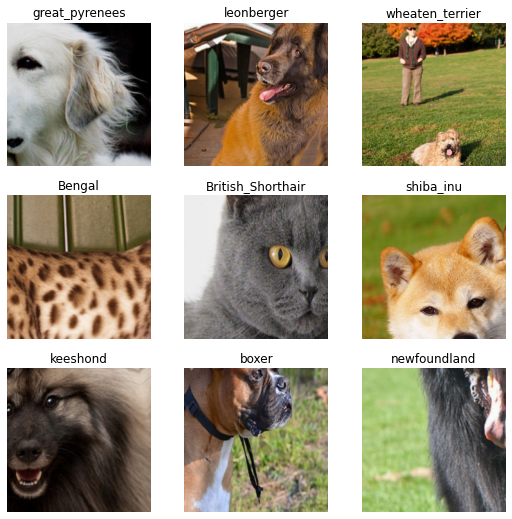

In [ ]:
dls.show_batch()

As well as specify which `DataLoader` (the training or validation) we want to see:

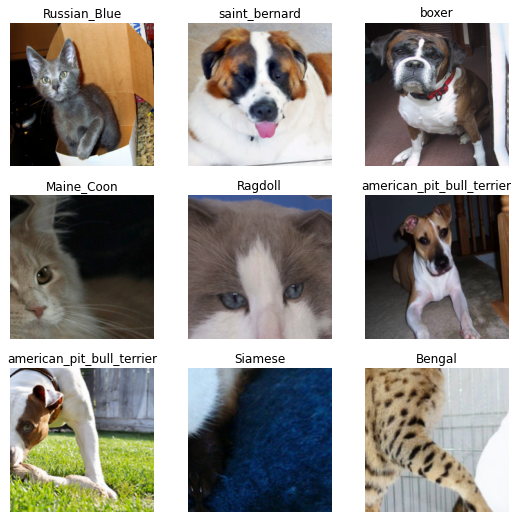

In [ ]:
dls.train.show_batch()

## Training Your Model

Next we will need to make a model to train on our data. This example will use the [ResNet34](https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035) architecture. To do so, we will call `cnn_learner` (or convolutional-neural-network) to generate a `Learner` ready to train. 

We will pass in our `DataLoaders` we made a moment ago, an architecture to use, as well as any metrics we would like to use. Metrics provide a human-readable understanding of the results in our model. We'll use the error rate in this example:



In [ ]:
learn = cnn_learner(dls, resnet34, pretrained=True, metrics=error_rate)

Now all that's needed is to fit our model to our data. This can be done quickly and effectively with `fastai`'s `fine_tune` method for transfer learning. We'll fit for six iterations through our data (or epochs):

In [ ]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,2.051884,0.379754,0.110284,01:07


epoch,train_loss,valid_loss,error_rate,time
0,0.909658,0.320852,0.102842,01:09
1,0.833673,0.328793,0.094046,01:09
2,0.725367,0.286304,0.094723,01:09
3,0.573307,0.249599,0.080514,01:09
4,0.522223,0.260281,0.082544,01:09


> Note: if each epoch takes more than a minute or two, you do not have the GPU enabled on your platform and are relying on the CPU

Great! We have only a 8% error rate at identifying 37 different types of cats and dogs, and we did so in less than 15 lines of code with the defaults! Not bad! If you want to take this further I invite you to learn about the `DataBlock` API in the next article or through any of the other fastai-related resources mentioned earlier. 

Lastly we can take a look at the results of our model by calling, you guessed it, `learn.show_results()`! Let's take a peek:

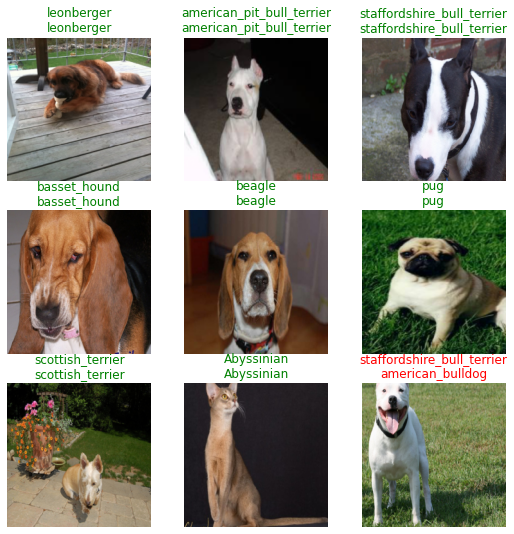

In [ ]:
learn.show_results()

## Now what can I do?

We have a trained model, and we need to utilize it in production. The first initial step is to `export` our model. This will package everything important to us in a production-level environment. Specifically this includes how our data was made (but not the data itself!), the transforms applied to them, and the model itself.
 

We'll do so below:

In [ ]:
learn.export(fname='export.pkl')

To load our models back in we call `load_learner`. We can then further map these to the CPU (by default) or GPU. We'll map to the GPU since we are still in our GPU instance:

In [ ]:
learn = load_learner(fname=path/'export.pkl', cpu=False)

## Gathering Predictions


 `fastai` has two methods to do this, `predict`, and `get_preds`. We'll focus on the prior but still mention the latter. 

### Predict

Predict is aimed at predicting one item. It will apply all the transforms done to our validation set only and then feed it to the model. Let's grab one of our filenames we trained on:

In [ ]:
test_im = imgs[0]; test_im

Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_194.jpg')

We simply pass this `path` into `predict` and it will tell us the relative class, the class index in the vocabulary, as well as the percentages:

In [ ]:
learn.predict(test_im)

('english_cocker_spaniel',
 tensor(18),
 tensor([2.7911e-06, 9.8194e-06, 5.7725e-07, 1.4929e-06, 2.4808e-06, 1.9052e-06,
         1.0944e-05, 8.0723e-06, 2.7175e-07, 4.1204e-06, 1.3944e-06, 2.8187e-05,
         5.4635e-06, 4.4745e-06, 1.0689e-05, 5.9237e-07, 3.9247e-06, 1.0384e-07,
         9.0385e-01, 1.1940e-04, 3.4542e-05, 1.4463e-05, 1.2706e-02, 4.1305e-06,
         5.4780e-06, 8.7920e-06, 8.0724e-08, 1.8775e-03, 8.8555e-07, 1.0900e-05,
         8.1132e-07, 1.1343e-06, 1.4847e-03, 3.3809e-07, 1.2145e-06, 7.9747e-02,
         3.1224e-05]))

If we are dealing with a slew of data at once, we can convert them into more of those batches again by calling `learn.dls.test_dl`. This will make a new validation `DataLoader` we can pass to `get_preds` to get predictions off of. We'll make one based on the first five images:

In [ ]:
fnames_test = imgs[:5]
dl = learn.dls.test_dl(fnames_test)

We can see it's just like our `DataLoaders` from earlier by calling `show_batch`:

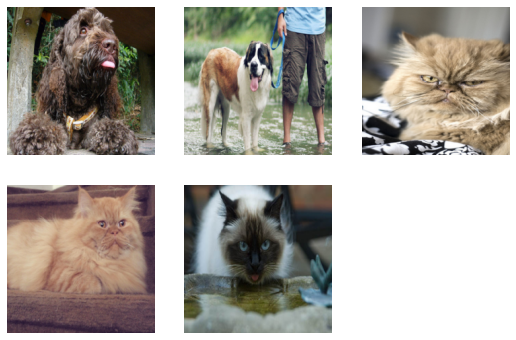

In [ ]:
dl.show_batch()

And finally we can grab predictions by passing our `dl` to `get_preds`:

In [ ]:
preds = learn.get_preds(dl=dl, with_decoded=True)

In [ ]:
preds[2]

tensor([18, 30,  7,  7,  2])

You'll notice it's a little different from `predict`, instead we get the raw probabilities and the class indicies inside of vocab:

In [ ]:
learn.dls.vocab[18]

'english_cocker_spaniel'

And that's it! Again if you wish to learn more, there is a [second part](https://muellerzr.github.io/fastblog/2020/08/20/_08_21-intermediate.html) to this series, Jeremy and Sylvains book, their new course, as well as my own course. Best of luck and enjoy the library!